# ML_SupportVectorMachines

Credits:

- [2021 Python for Machine Learning & Data Science Masterclass by Jose Portilla Udemy](https://www.udemy.com/course/python-for-machine-learning-data-science-masterclass/)

Inventor: Vladimir Vapnik

Support Vector Machines are one of the more complex algorithms we will learn, but it all begins with a simple premise: Does a *hyperplane* exist that can effectively separate classes?

- **Hyperplane**: In an N-dimensional space, a hyperplane is a flat affine subspace of hyperplane dimension N−1. For example:
    - 1-D Hyperplane is a single point
    - 2-D Hyperplane is a line
    - 3-D Hyperplane is flat plane

We mostly use the term hyperplance when we can't draw it on paper. The main idea behind SVM is that we can use Hyperplanes to create a separation between classes. 


- **Maximum Margin Classifier**
<img src='images/SVM1.png' width='800'>


- **Support Vector Classifier**: the name comes from the fact that the observations on the edges and within the Soft Margin are called Support Vectors.
<img src='images/SVM2.png' width='800'>


- **Support Vector Machines**: use Kernel Functions to systematically find Support Vector Classifiers in higher dimensions.
<img src='images/SVM3.png' width='800'>

- Kernel functions only calculate the relationships b/w every pair points as if they are in the higher dimensions. They don't actually do the transformation. Thus, they reduce the amount of computation required for SVM by avoiding the transformations from low to high dimensions.

<img src='images/SVM5.png' width='800'>

- From the figure above, the purpose of the Max Margin Classifier is to maximize M (which is the margin extending from the hyperplane : dist b/w the dotted and the solid line) by choosing the best $\beta$ coeffs. The contraints are that 
    - no data points can be within the margin: $y_{i} (\beta_0+\beta_1x_{i1}+....)\ge M$ 
    - the orthogonal distance from any data point to the hyperplane is greater than the margin: $\sum_{j=1}^{p} \beta_j^2=1$

- A Support Vector Classifier is same as the Max Margin Classifier, except that it allows for some misclassificatoin vis a $C$ value.
    - Sum of the error (wrt to margin): $\sum_{i=1}^n\epsilon_i \le C$
    - the margin with allowed errors: $y_{i} (\beta_0+\beta_1x_{i1}+....)\ge M(1-\epsilon_i)$ 


*NOTE: in scikit-learn the $C$ value is inversly proprotional to the $C$ value in the equaitons above!*

**Connection b/w Kernel and Dot-product**
- Polynomial Kernel

<img src='images/SVM6.png' width='800'>


- Radial Basis Function (RBF) / Radial Kernel

<img src='images/SVM7.png' width='800'>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os, sys
sys.path.append('modules')

from svm_margin_plot import plot_svm_boundary

## Data

The data shown here simulates a medical study in which mice infected with a virus were given various doses of two medicines and then checked 2 weeks later to see if they were still infected. Given this data, our goal is to create a classifcation model than predict (given two dosage measurements) if they mouse will still be infected with the virus.

You will notice the groups are very separable, this is on purpose, to explore how the various parameters of an SVM model behave.

In [2]:
df = pd.read_csv('data/mouse_viral_study.csv')
df.sample(5)

,Med_1_mL,Med_2_mL,Virus Present
38,3.982796,3.519737,1
126,8.387823,7.121461,0
287,6.881996,9.096154,0
315,7.773382,6.688422,0
42,4.103670,4.347593,1


## EDA

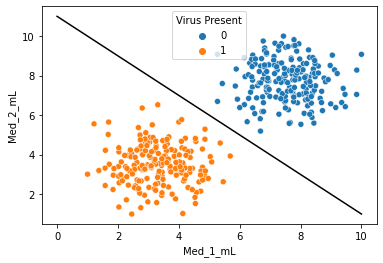

In [3]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',data=df,
                hue='Virus Present');
# HYPERPLANE (Guess)
x = np.linspace(0,10,100)
y = -1*x+11
plt.plot(x,y,'k');

- Clearly the data is very separable!

## SVM

In [4]:
X = df.drop('Virus Present',axis=1)
y = df['Virus Present']

### Linear Kernel

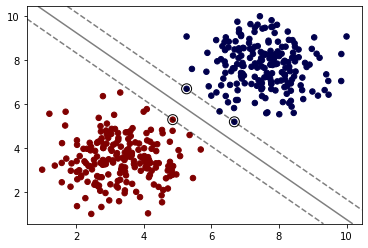

In [5]:
from sklearn.svm import SVC

model = SVC(kernel='linear',C=1000)
model.fit(X,y)
plot_svm_boundary(model,X,y)

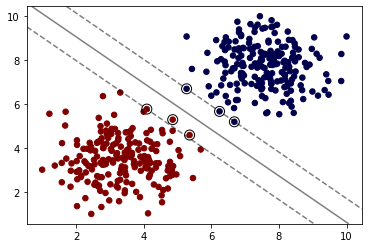

In [6]:
model = SVC(kernel='linear',C=0.5)
model.fit(X,y)
plot_svm_boundary(model,X,y)

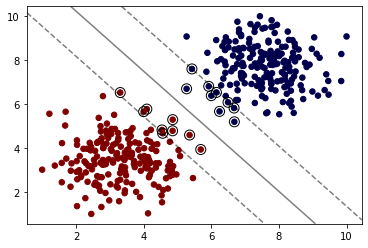

In [7]:
model = SVC(kernel='linear',C=0.05)
model.fit(X,y)
plot_svm_boundary(model,X,y) 

- The lower the value of C (in sklearn SVM), the softer (wider) the margin becomes!

### RBF Kernel

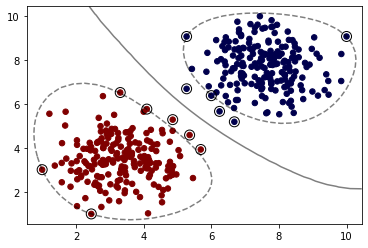

In [19]:
model = SVC(kernel='rbf',C=1,gamma='scale') # all default SVM params
model.fit(X,y)
plot_svm_boundary(model,X,y)

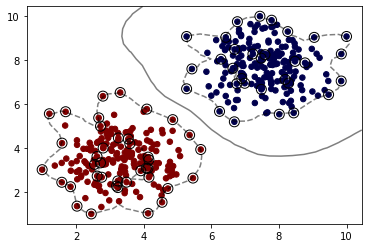

In [21]:
model = SVC(kernel='rbf',C=1,gamma=0.9) # overfitting
model.fit(X,y)
plot_svm_boundary(model,X,y)

### Sigmoid Kernel

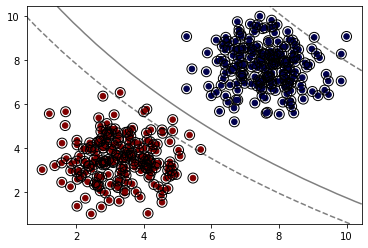

In [22]:
model = SVC(kernel='sigmoid') # All points bcms support vec! :(
model.fit(X,y)
plot_svm_boundary(model,X,y)

### Polynomial Kernel

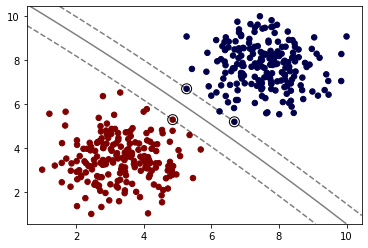

In [23]:
model = SVC(kernel='poly',C=1,degree=1) # Same as linear (deg=1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

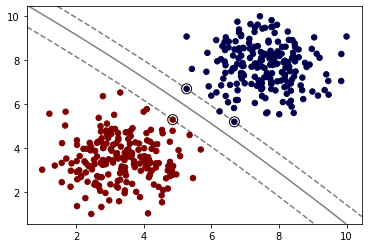

In [27]:
model = SVC(kernel='poly',C=1,degree=4)
model.fit(X,y)
plot_svm_boundary(model,X,y)

## GridSearchCV

Keep in mind, for this simple example, we saw the classes were easily separated, which means each variation of model could easily get 100% accuracy, meaning a grid search is "useless".

In [28]:
from sklearn.model_selection import GridSearchCV

svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}

grid = GridSearchCV(svm,param_grid)
grid.fit(X,y)
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

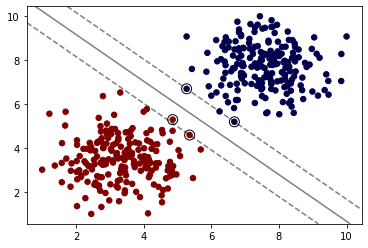

In [31]:
plot_svm_boundary(SVC(C=1,kernel='linear').fit(X,y),X,y)

# Support Vector Regression (SVR)

## Data

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="images/Types_of_concrete_slump.jpg">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (7) (component kg in one M^3 concrete):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

Output variables (3):
* SLUMP (cm)
* FLOW (cm)
* **28-day Compressive Strength (Mpa)**

[Data Source](https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test)

In [32]:
df = pd.read_csv('data/cement_slump.csv')
df.sample(5)

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
49,326.0,0.0,167.0,174.0,6.0,884.0,792.0,21.5,42.0,52.65
14,374.0,0.0,0.0,190.0,7.0,1013.0,730.0,14.5,42.5,32.44
93,172.0,162.1,238.5,166.0,7.4,953.3,641.4,0.0,20.0,41.54
10,145.0,106.0,136.0,208.0,10.0,751.0,883.0,24.5,61.0,26.02
30,321.0,0.0,164.0,190.0,5.0,870.0,774.0,24.0,60.0,45.82


## EDA

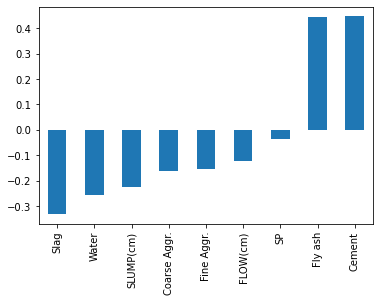

In [55]:
# plt.figure(figsize=(8,8),dpi=150)
# sns.heatmap(df.corr(),annot=True,cmap='viridis');
df.corr()['Compressive Strength (28-day)(Mpa)']\
.sort_values()[:-1].plot(kind='bar');

- Compressive Strength is highly correlated with Fly Ash and  Cement!

## SV Regression

In [37]:
X = df.drop('Compressive Strength (28-day)(Mpa)',axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3, random_state=101)

- Whenever you use a ML model which looks into the geometry of the feature space, make sure that you scale the data!

In [40]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scaled_X_train = scalar.fit_transform(X_train)
scaled_X_test = scalar.transform(X_test)

In [42]:
from sklearn.svm import SVR,LinearSVR

svr = SVR()
svr.fit(scaled_X_train,y_train)
pred = svr.predict(scaled_X_test)

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

y_test.mean(), mean_absolute_error(y_test,pred), \
mean_squared_error(y_test,pred)**0.5

(36.26870967741935, 5.236902091259178, 6.695914838327133)

In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.001,0.01,0.1,0.5,1],
              'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]
             }

grid_model = GridSearchCV(SVR(),param_grid)
grid_model.fit(scaled_X_train,y_train)
print(grid_model.best_params_)
grid_pred = grid_model.predict(scaled_X_test)

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [51]:
y_test.mean(), mean_absolute_error(y_test,grid_pred), \
mean_squared_error(y_test,grid_pred)**0.5

(36.26870967741935, 2.5128012210762365, 3.178210305119858)

- So we improved on error using GridSearch Cross Validation!